In [52]:
%load_ext autoreload
%autoreload
%matplotlib inline
from pathlib import Path
#from train import *
from learner import *
from unet_dataset import *
from torch.utils.tensorboard import SummaryWriter
import torch
import torchvision

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of learner failed: Traceback (most recent call last):
  File "/software/ml/JupyterHub/conda-env-20191018-0822/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/software/ml/JupyterHub/conda-env-20191018-0822/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/software/ml/JupyterHub/conda-env-20191018-0822/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/software/ml/JupyterHub/conda-env-20191018-0822/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "/software/ml/JupyterHub/conda-env-20191018-0822/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 280, in update_instances
    frame = next(frame_nfo.frame for frame_nfo in inspect.stack()
StopIteration
]

In [5]:
model_id = 'unet_v1_test'
train_id = 1
log_id = model_id + str(train_id)

In [7]:
train_dataset=UNetDataset(root_dir=Path('advanced_dataset'), part='train')
test_dataset=UNetDataset(root_dir=Path('advanced_dataset'), part='test')

In [8]:
model = UNet(size=train_dataset.item_size, in_channels=train_dataset.image_channels, classes=train_dataset.classes, depth=5)

In [9]:
writer = SummaryWriter('runs/' + log_id)

In [10]:
def handle_end_epoch(epoch_loss, epoch):
    writer.add_scalar('loss', epoch_loss, epoch)

In [53]:
callback = LearnerCallback(end_epoch=handle_end_epoch)

learner = UNetLearner(model, train_dataset=train_dataset, cuda=True, callback=callback)

In [57]:
learner.train(n_epochs=5, batch_size=2)

Epoch 2 loss: 3.26496285200119
Epoch 3 loss: 3.2652058601379395
Epoch 4 loss: 3.265248656272888
Epoch 5 loss: 3.264745056629181
Epoch 6 loss: 3.2664284110069275


CURRENT EPOCH 6 LOSSES [3.2685675024986267, 3.264621913433075, 3.26496285200119, 3.2652058601379395, 3.265248656272888, 3.264745056629181, 3.2664284110069275]


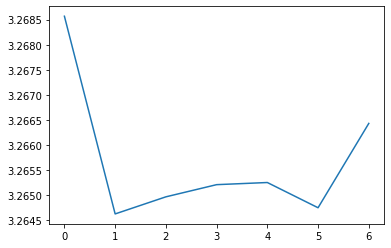

In [58]:
learner.plot_losses()

In [40]:
list(range(0, 2))

[0, 1]